#Importing libraries

In [ ]:
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

import re
from collections import Counter
import operator
import statistics
from scipy.stats import norm
import numpy as np

#Data Preprocessing

##Deleting headers and footers

In [ ]:
def del_headears_footers(lyric : str) -> str:

    # find start index
    start_token = 'Lyrics'
    start_index = lyric.find(start_token)

    # find end index
    end_token = 'Embed'
    end_index = lyric.find(end_token)

    # cut lyrics edge
    lyric = lyric[start_index + len(start_token):end_index]

    # eliminate final numbers

    # calculate len
    length = len(lyric)

    # last character
    last_character = lyric[length - 1]

    # delete last char till is no  more a number
    while is_number(last_character):

        lyric = lyric[:length - 1]

        length = len(lyric)

        last_character = lyric[length - 1]

    return lyric

##Datasets

For now, the first dataset, the uncleaned one, will remain in the form of a dictionary to make it easier for us to display the characteristics we want to display. The second dataset who is also in the form of a dictionary, will be turned into a csv file in the end of the notebook.

###Uncleaned dataset


This dataset will be used just for data analysis because it has some useful dividing tokens left inside that will make it easier for us to visualize what we want.

In [ ]:
def del_special_chars(s : str) -> str:

    special_chars = ['[', ']', '(', ')', '{', '}',',','.',':','/']

    clean_s = ''

    for c in s:

        if (c in special_chars):

            continue

        clean_s += c

    return clean_s

def get_raw_lyrics(
    genres : list, path = 'lyrics',
    div_token = '\n \n    <|endoftext|>', remove_new_line_char = False,
    verbose = True) -> dict:

    print("-----------------------")
    print(f'Division token between lyrics: {div_token}')
    print(f"remove_new_line_char: {remove_new_line_char}")
    print("-----------------------\n")

    raw_lyrics = {}    # raw lyrics dictionary
    n_songs = 0
    n_skipped_songs = 0

    for g in genres:

        print(f'Going through folder: {g}')

        raw_lyrics[g] = []

        for f in os.listdir(f"lyrics/{g}"):
            with open(f"lyrics/{g}/{f}", "r") as file:

                lyrics = file.read()
                lyrics = lyrics.split(div_token)
                # lyrics : list
                    ## each item represents a song from the artist we are examinating

                for s in lyrics:    # iterate through artist songs

                    n_songs += 1    # upgrade n_songs

                    if len(s) < 100:    # check if song is broken sample
                        n_skipped_songs += 1
                        continue # we pass to the next song

                    # deleting header and footer
                    s = del_headears_footers(s)

                    if remove_new_line_char:
                        s = del_nlc(s)

                    # remove special characters (we keep \n, it represents the end of the bar)
                    s = del_special_chars(s)

                    # only lowercase letters
                    s = s.lower()

                    raw_lyrics[g].append(s) # append to dictionary
    if verbose:
        # print additional info
        print(f"\nn_songs = {n_songs}")
        print(f"\nn_skipped_songs = {n_skipped_songs}")
        print(f"\ndataset_size = {n_songs - n_skipped_songs}")

    print('[Finish]')
    return raw_lyrics

raw_lyrics = get_raw_lyrics(genres=['rap_lyrics', 'rock_lyrics', 'pop_lyrics', 'country_lyrics'])

###Cleaned dataset

This dataset will be used for the model training and thus its free of all special characters.

In [ ]:
def del_special_chars_clean_df(s : str) -> str:

    special_chars = ['[', ']', '(', ')', '{', '}',',','.',':','/', '\n']

    clean_s = ''

    for c in s:

        if (c in special_chars):

            continue


        clean_s += c

    return clean_s

In [ ]:
def get_clean_lyrics(
    genres : list, path = 'lyrics',
    div_token = '\n \n    <|endoftext|>', remove_new_line_char = False,
    verbose = True) -> dict:

    print("-----------------------")
    print(f'Division token between lyrics: {div_token}')
    print(f"remove_new_line_char: {remove_new_line_char}")
    print("-----------------------\n")

    raw_lyrics = {}    # raw lyrics dictionary
    n_songs = 0
    n_skipped_songs = 0

    for g in genres:

        print(f'Going through folder: {g}')

        raw_lyrics[g] = []

        for f in os.listdir(f"lyrics/{g}"):
            with open(f"lyrics/{g}/{f}", "r") as file:

                lyrics = file.read()
                lyrics = lyrics.split(div_token)
                # lyrics : list
                    ## each item represents a song from the artist we are examinating

                for s in lyrics:    # iterate through artist songs

                    n_songs += 1    # upgrade n_songs

                    if len(s) < 100:    # check if song is broken sample
                        n_skipped_songs += 1
                        continue # we pass to the next song

                    # deleting header and footer
                    s = del_headears_footers(s)

                    if remove_new_line_char:
                        s = del_nlc(s)

                    # remove special characters (we keep \n, it represents the end of the bar)
                    s = del_special_chars_clean_df(s)

                    # only lowercase letters
                    s = s.lower()

                    raw_lyrics[g].append(s) # append to dictionary
    if verbose:
        # print additional info
        print(f"\nn_songs = {n_songs}")
        print(f"\nn_skipped_songs = {n_skipped_songs}")
        print(f"\ndataset_size = {n_songs - n_skipped_songs}")

    print('[Finish]')
    return raw_lyrics

clean_lyrics = get_clean_lyrics(genres=['rap_lyrics', 'rock_lyrics', 'pop_lyrics', 'country_lyrics'])

In [ ]:
def del_nlc(s : str) -> str:

    clean_s = ""

    for c in s:
        if c == "\n":
            clean_s += " "
            continue
        clean_s += c

    return clean_s

#Explanatory Data Analysis

In [ ]:
for g in raw_lyrics.keys():
    n_song = len(raw_lyrics[g])
    print(f"Number of {g}: {n_song}")

Number of rap_lyrics: 2879
Number of rock_lyrics: 2758
Number of pop_lyrics: 2438
Number of country_lyrics: 2920


### Word occurrences x music genre

In [ ]:
def count_word_occurrences(string):
    words = string.split()
    word_counts = Counter(words)
    return word_counts

In [ ]:
def sum_dictionaries(dict1, dict2):
    counter1 = Counter(dict1)
    counter2 = Counter(dict2)
    summed_counter = counter1 + counter2
    summed_dictionary = dict(summed_counter)
    return summed_dictionary

In [ ]:
def word_count(list_of_songs : list, final_dictionary = {}) -> dict:

    # iterate through songs

    for song in list_of_songs:

        # sorted song word-count dictionary:
        occurrences = dict(count_word_occurrences(song))

        # upgrade tot_word_count dictionary
        final_dictionary = sum_dictionaries(occurrences, final_dictionary)


    return final_dictionary

In [ ]:
def sort_dictionary_by_values(dictionary):
    sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict

##Word counts for each music genere

In [ ]:
rap_words_count = sort_dictionary_by_values(word_count(a_lemm['rap_lyrics']))

rock_words_count = sort_dictionary_by_values(word_count(a_lemm['rock_lyrics']))

country_words_count = sort_dictionary_by_values(word_count(a_lemm['country_lyrics']))

pop_words_count = sort_dictionary_by_values(word_count(a_lemm['pop_lyrics']))

There are some words in the english language that are very commonly used in everyday language and songs too for that matter. In order to properly study our data we remove those words because they hold no meaning compared to the popular words that are used in the songs.

## Deleting most frequent words

In [ ]:
def del_most_freq_ws(dictionary : dict, path = "data/wiki_freq_w.txt") -> dict:

    new_dic = dictionary.copy()

    # https://en.wikipedia.org/wiki/Most_common_words_in_English
    with open(path, 'r') as file:
        contents = file.read()
        words = ((' '.join(re.findall(r'\b\w+\b', contents))).lower()).split()

    for word in words:
        new_dic.pop(word, None)

    return new_dic

In [ ]:
clean_rap_c = del_most_freq_ws(rap_words_count)
clean_rock_c = del_most_freq_ws(rock_words_count)
clean_country_c = del_most_freq_ws(country_words_count)
clean_pop_c = del_most_freq_ws(pop_words_count)

In [ ]:
counts = {
    'rap' : clean_rap_c,
    'rock' : clean_rock_c,
    'country' : clean_country_c,
    'pop' : clean_pop_c
}

## Top 20 most popular words for each genere

In [ ]:
def plot_n_mfw(n : int, counts = counts, ncols = 2, nrows = 2):


    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))

    for y in range(ncols):
        for x in range(nrows):

            # (x, y) index for plot

            # dict indedx
            idx = x + y
            if y == 1:
                idx += 1

            k = list(counts.keys())[idx]
            xs = list(counts[k].keys())
            ys = list(counts[k].values())

            # upgrade for n
            ys = ys[:n]
            xs = xs[:n]

            #plot
            axs[x, y].bar(xs, ys, align='center', color='red')
            axs[x, y].set_title(f"{n} Most Poplar Words in {k} Lyrics:")
            axs[x, y].set_xlabel("Most Popular Words")


    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.tight_layout()


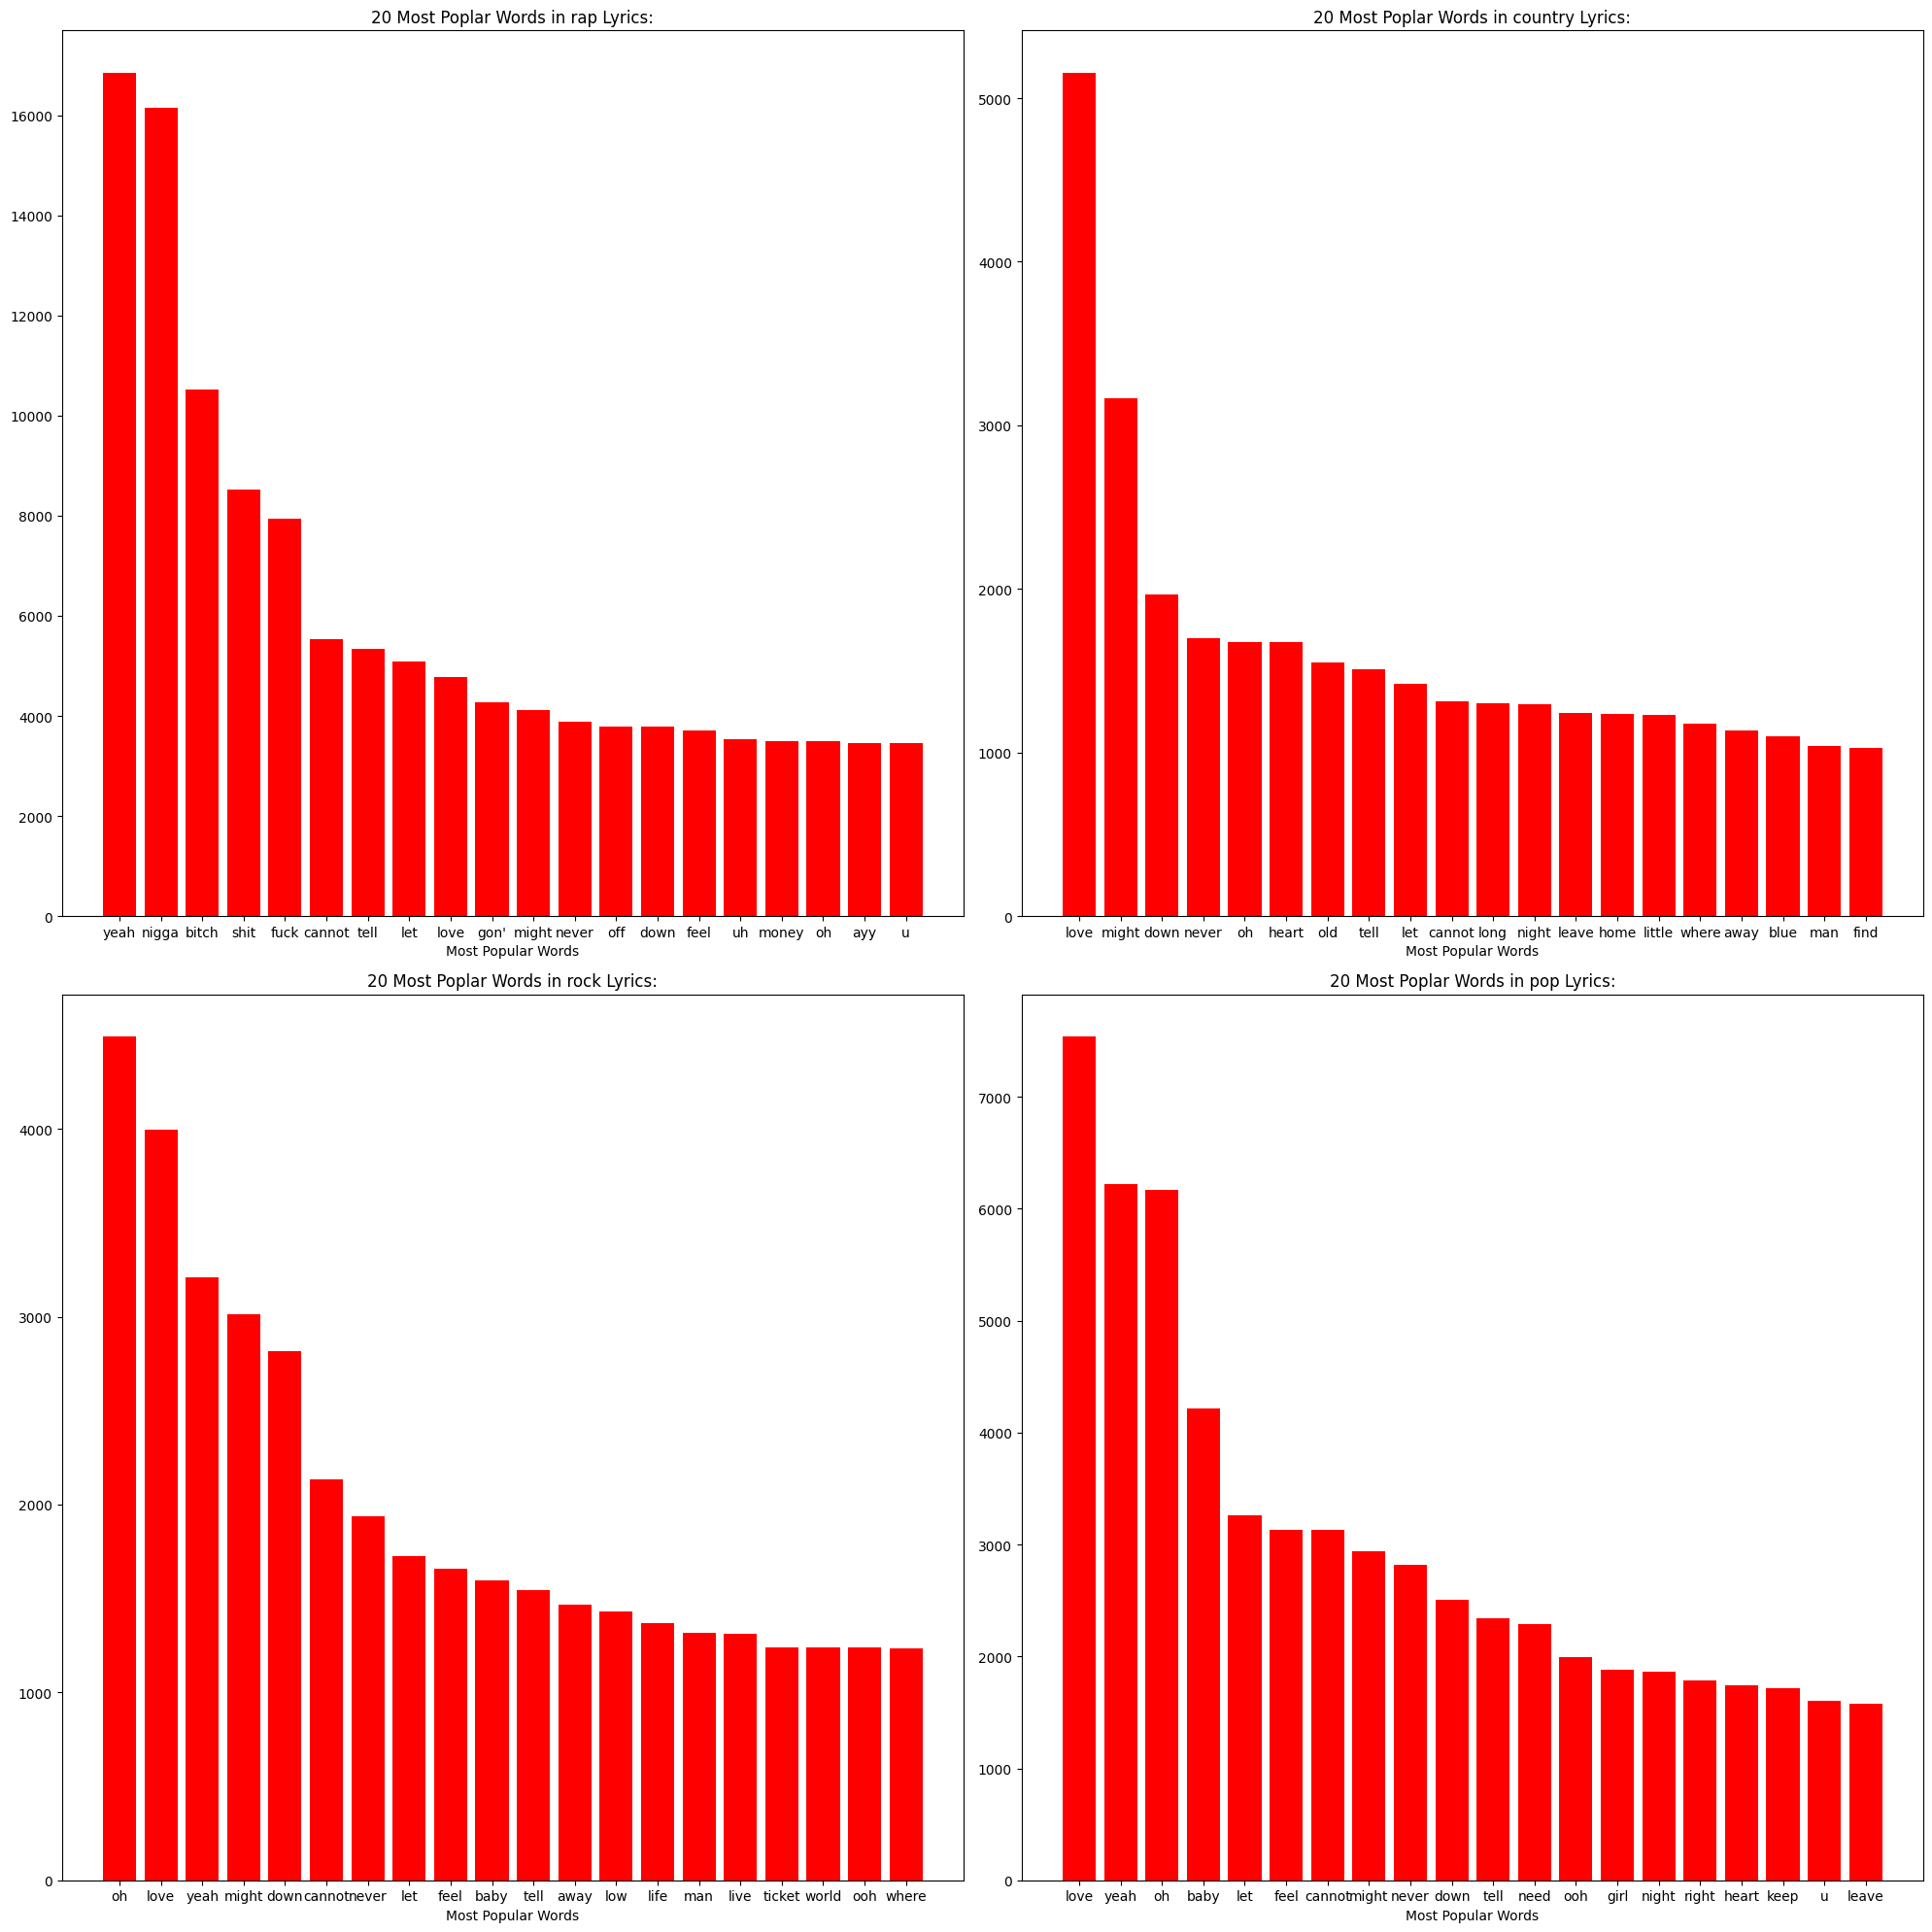

In [ ]:
plot_n_mfw(n=20)

## String length of each song in a genere

In [ ]:
# getting the lengths of each string for each genere
def str_len(lyrics):
    lengths = []
    for lyric in lyrics:
        lengths.append(len(lyric))
    return lengths

rap_lyric_len = str_len(raw_lyrics['rap_lyrics'])
pop_lyric_len = str_len(raw_lyrics['pop_lyrics'])
country_lyric_len = str_len(raw_lyrics['country_lyrics'])
rock_lyric_len = str_len(raw_lyrics['rock_lyrics'])

## Song word count

With song word count we imply the number of words each song in each genere has. The lists below have the number of words for each song in their category.

In [ ]:
# counting the words of each song for each genere
def count_words(lyrics):
    # list to append the lists with the count of words for each song
    words_num = []
    # iterating through the lyrics
    for lyric in lyrics:
        # appending the sum of count of words for each song
        words_num.append(sum(list(word_count(lyric.split()).values())))
    return words_num

rap_word_count = count_words(raw_lyrics['rap_lyrics'])
pop_word_count = count_words(raw_lyrics['pop_lyrics'])
rock_word_count = count_words(raw_lyrics['rock_lyrics'])
country_word_count = count_words(raw_lyrics['country_lyrics'])

## Song line count

With line count we imply the number of lines each song in each genere has. The lists below have the number of lines for each song in their category.

In [ ]:
def count_lines(lyrics):
    lines = []
    for lyric in lyrics:
        s = 0
        for line in lyric.split('\n'):
            s += 1
        lines.append(s)
    return lines

rap_lines = count_lines(raw_lyrics['rap_lyrics'])
pop_lines = count_lines(raw_lyrics['pop_lyrics'])
country_lines = count_lines(raw_lyrics['country_lyrics'])
rock_lines = count_lines(raw_lyrics['rock_lyrics'])

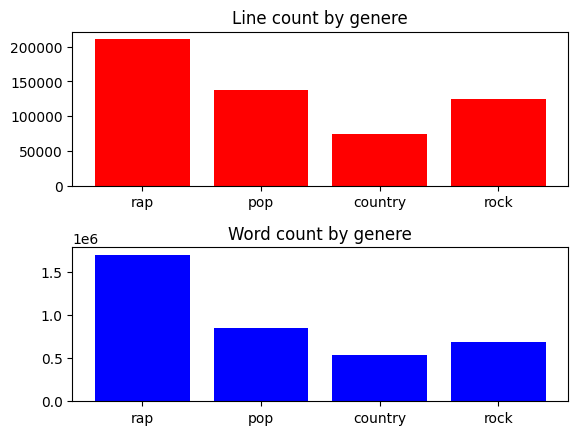

In [ ]:
fig, axs = plt.subplots(2)
axs[0].bar(['rap', 'pop', 'country', 'rock'], [sum(rap_lines), sum(pop_lines), sum(country_lines), sum(rock_lines)], color='red')
axs[0].set_title('Line count by genere')

axs[1].bar(['rap', 'pop', 'country', 'rock'], [sum(rap_word_count), sum(pop_word_count), sum(country_word_count), sum(rock_word_count)], color='blue')
axs[1].set_title('Word count by genere')

fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.show()

## Graphs of the statistics

### For word count:

In [ ]:
def calculate_statistics(data):
    m = statistics.mean(data)
    s = statistics.stdev(data)
    v = statistics.variance(data)
    return (m, s, v)

# for word count
rap_mean_w, rap_stdev_w, rap_variance_w = calculate_statistics(rap_word_count)
pop_mean_w, pop_stdev_w, pop_variance_w = calculate_statistics(pop_word_count)
country_mean_w, country_stdev_w, country_variance_w = calculate_statistics(country_word_count)
rock_mean_w, rock_stdev_w, rock_variance_w = calculate_statistics(rock_word_count)

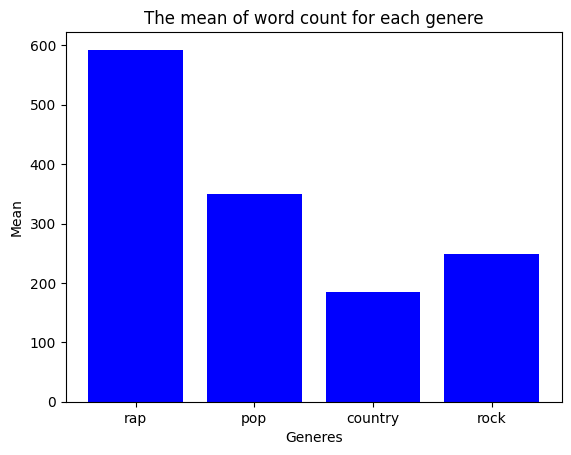

In [ ]:
plt.bar(['rap', 'pop', 'country', 'rock'], [rap_mean_w, pop_mean_w, country_mean_w, rock_mean_w], color='blue')
plt.xlabel("Generes")
plt.ylabel('Mean')
plt.title("The mean of word count for each genere")
plt.show()


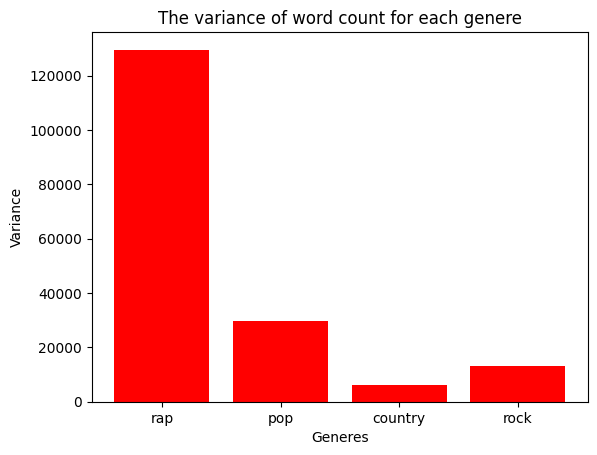

In [ ]:
plt.bar(['rap', 'pop', 'country', 'rock'], [rap_variance_w, pop_variance_w, country_variance_w, rock_variance_w], color='red')
plt.xlabel("Generes")
plt.ylabel('Variance')
plt.title("The variance of word count for each genere")
plt.show()


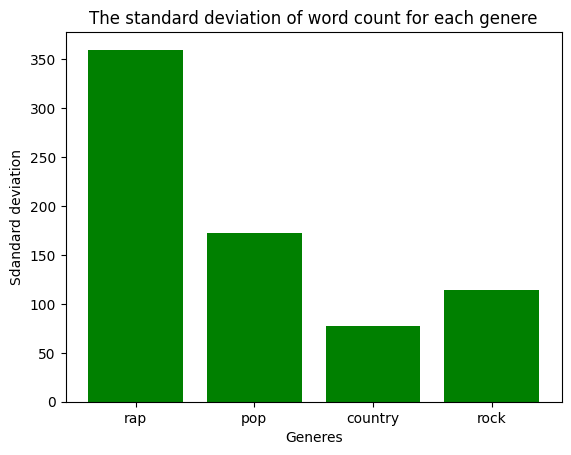

In [ ]:
plt.bar(['rap', 'pop', 'country', 'rock'], [rap_stdev_w, pop_stdev_w, country_stdev_w, rock_stdev_w], color='green')
plt.xlabel("Generes")
plt.ylabel('Sdandard deviation')
plt.title("The standard deviation of word count for each genere")
plt.show()


### For line count:

In [ ]:
rap_mean_l, rap_stdev_l, rap_variance_l = calculate_statistics(rap_lines)
pop_mean_l, pop_stdev_l, pop_variance_l = calculate_statistics(pop_lines)
country_mean_l, country_stdev_l, country_variance_l = calculate_statistics(country_lines)
rock_mean_l, rock_stdev_l, rock_variance_l = calculate_statistics(rock_lines)

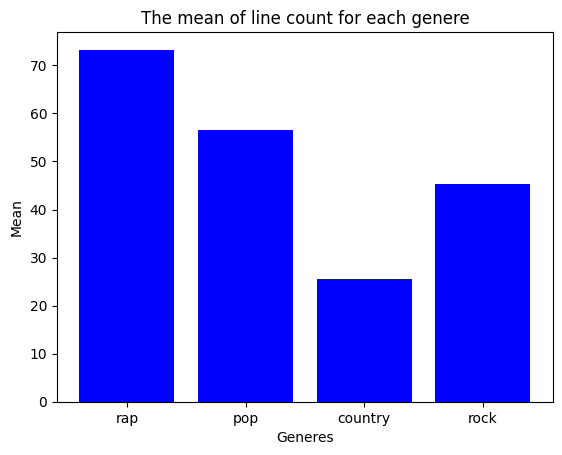

In [ ]:
plt.bar(['rap', 'pop', 'country', 'rock'], [rap_mean_l, pop_mean_l, country_mean_l, rock_mean_l], color='blue')
plt.xlabel("Generes")
plt.ylabel('Mean')
plt.title("The mean of line count for each genere")
plt.show()

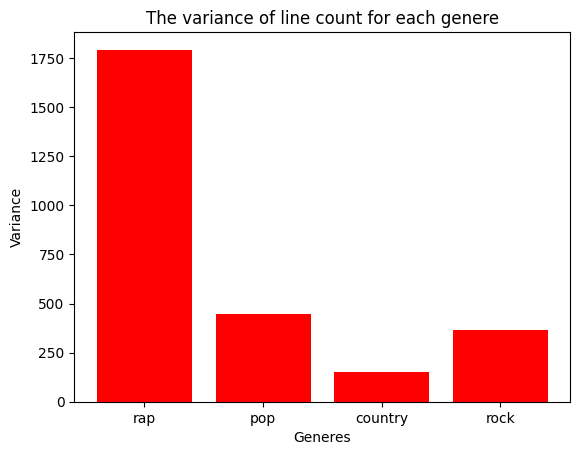

In [ ]:
plt.bar(['rap', 'pop', 'country', 'rock'], [rap_variance_l, pop_variance_l, country_variance_l, rock_variance_l], color='red')
plt.xlabel("Generes")
plt.ylabel('Variance')
plt.title("The variance of line count for each genere")
plt.show()


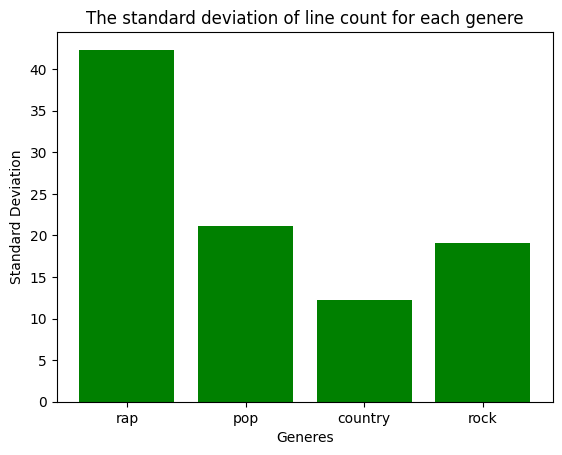

In [ ]:
plt.bar(['rap', 'pop', 'country', 'rock'], [rap_stdev_l, pop_stdev_l, country_stdev_l, rock_stdev_l], color='green')
plt.xlabel("Generes")
plt.ylabel('Standard Deviation')
plt.title("The standard deviation of line count for each genere")
plt.show()


In [ ]:
mini_df.to_csv('lyrics_statistics.csv')

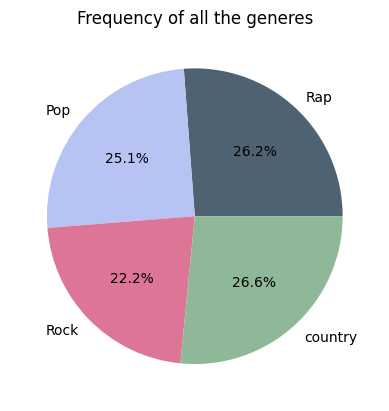

In [ ]:
labels = ['Rap', 'Pop', 'Rock', 'country']
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie([2879, 2758, 2438, 2920], labels=labels, autopct='%1.1f%%',
        colors = colors)
plt.title('Frequency of all the generes')
plt.show()

# Final dataset

Here the second dataset mentioned in the first preprocessing stage will be turned into a csv file for later use for our model.

In [ ]:
def create_rows(data, genere):
    lyrics = []
    for i in range(len(data)):
        lyrics.append([data[i], genere])
    return lyrics


In [ ]:
import csv

fields = ['lyrics', 'genere']


with open('GFG_clean', 'w') as f:
    write = csv.writer(f)
    write.writerow(fields)

    # write the rows with the lyrics, artist name, genere

    # rap
    write.writerows(create_rows(clean_lyrics['rap_lyrics'], 'rap'))

    # pop
    write.writerows(create_rows(clean_lyrics['pop_lyrics'], 'pop'))

    # country
    write.writerows(create_rows(clean_lyrics['country_lyrics'], 'country'))

    # rock
    write.writerows(create_rows(clean_lyrics['rock_lyrics'], 'rock'))


In [ ]:
clean_data = pd.read_csv('/work/GFG_clean')
df = pd.DataFrame(clean_data)
df.to_csv('lyrics_dataframe_clean.csv')